In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('TeamStonks Analytics.csv')

In [3]:
data

,Timestamp,StartedLevel,EndLevel,TimeRemainingOnEnd
0,2022/09/26 5:44:23 PM MDT,1.0,NaN,NaN
1,2022/09/26 5:44:38 PM MDT,NaN,1.0,NaN
2,2022/09/26 5:44:46 PM MDT,1.0,NaN,NaN
3,2022/09/26 5:45:12 PM MDT,1.0,NaN,NaN
4,2022/09/26 5:45:40 PM MDT,1.0,NaN,NaN
5,2022/09/26 5:45:58 PM MDT,NaN,1.0,NaN
6,2022/09/26 5:46:34 PM MDT,1.0,NaN,NaN
7,2022/09/26 5:46:44 PM MDT,NaN,1.0,NaN
8,2022/09/26 5:46:46 PM MDT,1.0,NaN,NaN
9,2022/09/26 5:47:09 PM MDT,NaN,1.0,NaN


### Analytics graph #1

In [13]:
# ylabels = [data['StartedLevel'].sum(), data['EndLevel'].sum()]
lvl_starts = [23, 19, 5]
lvl_ends = [21, 6, 2]

In [14]:
labels = ['Lvl 1', 'Lvl 2', 'Lvl3']
xlabels = ['Game Started', 'Game Ended']

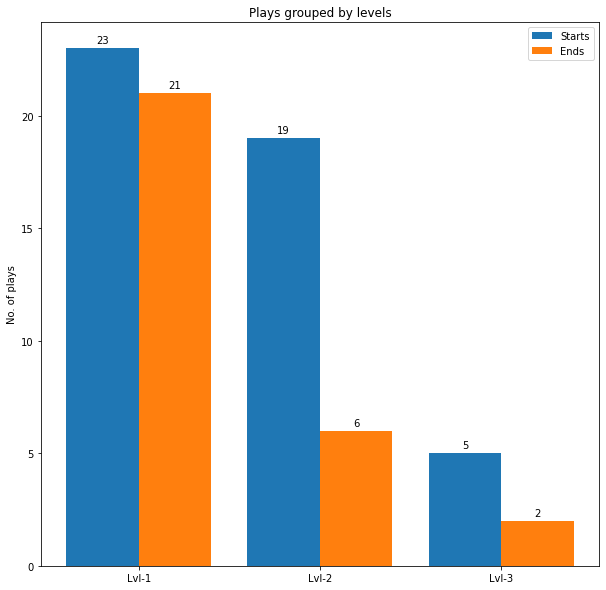

In [61]:
x = np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots(figsize=(10,10))
rects1 = ax.bar(x - width/2, lvl_starts, width, label='Starts')
rects2 = ax.bar(x + width/2, lvl_ends, width, label='Ends')

ax.set_ylabel('No. of plays')
ax.set_title('Plays grouped by levels')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
plt.show()

### Analytics graph #2

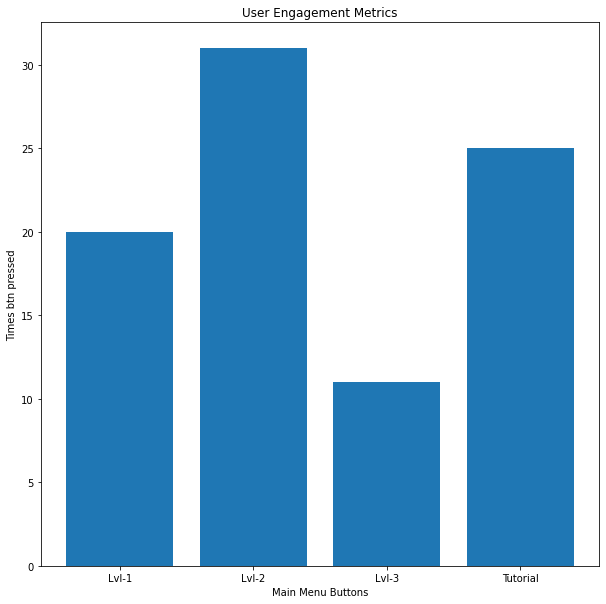

In [4]:
x = ['Lvl-1', 'Lvl-2', 'Lvl-3', 'Tutorial']

y = [20, 31, 11, 25]

x_pos = [i for i in range(len(x))]

fig = plt.figure(figsize=(10,10)) 

plt.bar(x_pos, y)

plt.xlabel("Main Menu Buttons")

plt.ylabel("Times btn pressed")

plt.title("User Engagement Metrics")

plt.xticks(x_pos, x)

plt.show()

### Analytics graph #3 

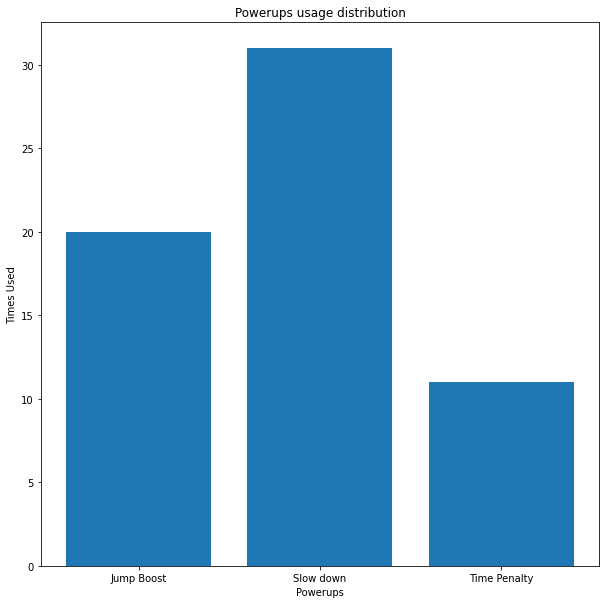

In [62]:
x = ['Jump Boost', 'Slow down', 'Time Penalty']

y = [20, 31, 11]

x_pos = [i for i in range(len(x))]

fig = plt.figure(figsize=(10,10)) 

plt.bar(x_pos, y)

plt.xlabel("Powerups")

plt.ylabel("Times Used")

plt.title("Powerups usage distribution")

plt.xticks(x_pos, x)

plt.show()

### Analytics graph #4

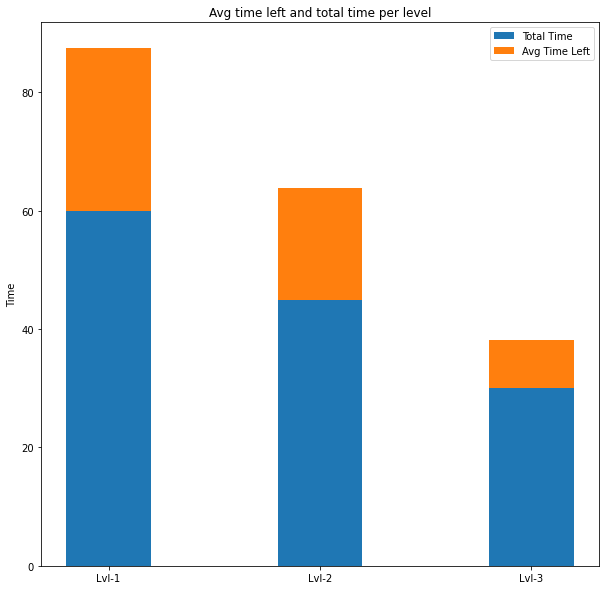

In [60]:
labels = ['Lvl-1', 'Lvl-2', 'Lvl-3']

avg_time_left = [27.5, 18.9, 8.2]

total_time = [60, 45, 30]

width = 0.4

fig, ax = plt.subplots(figsize=(10,10))

ax.bar(labels, total_time, width, label='Total Time')

ax.bar(labels, avg_time_left, width, bottom=total_time, label='Avg Time Left')

ax.set_ylabel('Time')

ax.set_title('Avg time left and total time per level')

ax.legend()

plt.show()

### Analytics graph #5

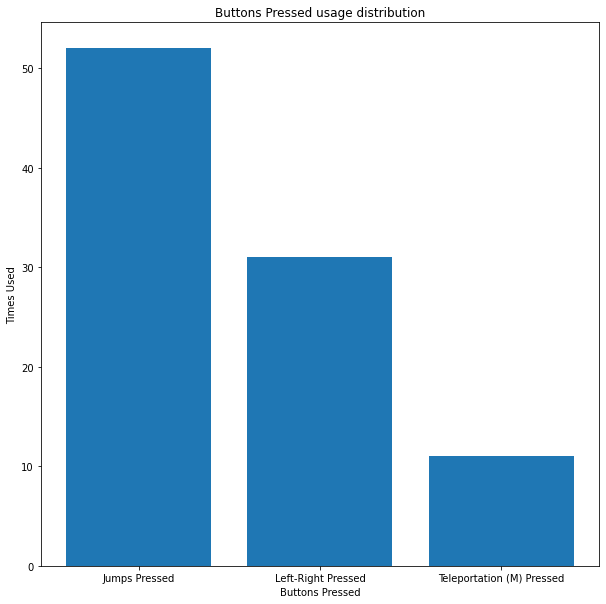

In [3]:
x = ['Jumps Pressed', 'Left-Right Pressed', 'Teleportation (M) Pressed']

y = [52, 31, 11]

x_pos = [i for i in range(len(x))]

fig = plt.figure(figsize=(10,10)) 

plt.bar(x_pos, y)

plt.xlabel("Buttons Pressed")

plt.ylabel("Times Used")

plt.title("Buttons Pressed usage distribution")

plt.xticks(x_pos, x)

plt.show()

### Analytics graph #6

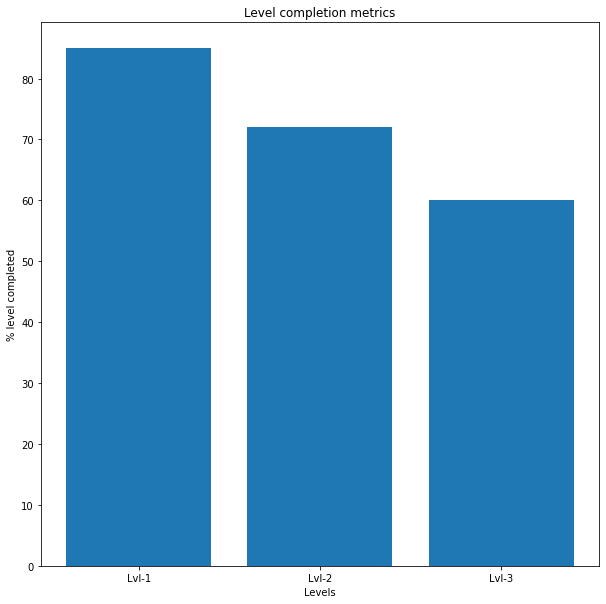

In [6]:
x = ['Lvl-1', 'Lvl-2', 'Lvl-3']

y = [85, 72, 60]

x_pos = [i for i in range(len(x))]

fig = plt.figure(figsize=(10,10)) 

plt.bar(x_pos, y)

plt.xlabel("Levels")

plt.ylabel("% level completed")

plt.title("Level completion metrics")

plt.xticks(x_pos, x)

plt.show()

Text(0, 0.5, 'Number of times')

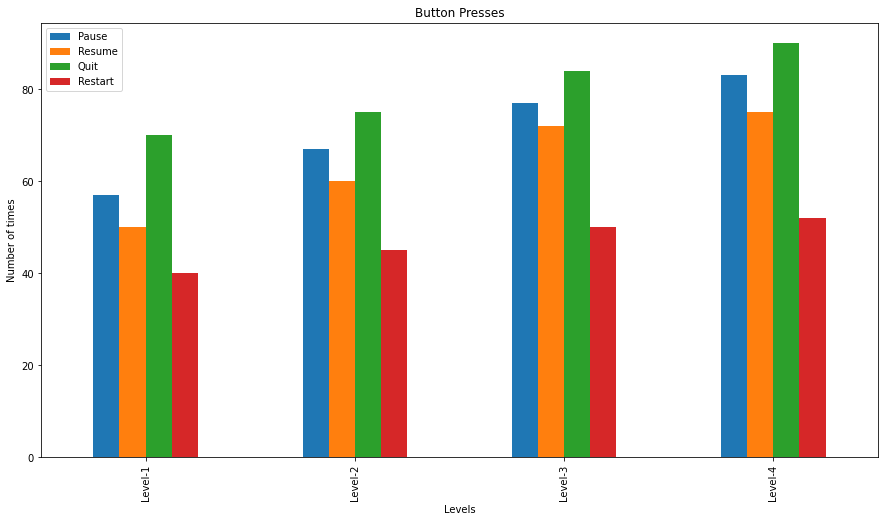

In [2]:
import pandas as pd

plotdata = pd.DataFrame({

    "Pause":[57,67,77,83],

    "Resume":[50,60,72,75],

    "Quit":[70,75,84,90],
    
    "Restart":[40,45,50,52]},
    

    index=["Level-1", "Level-2", "Level-3", "Level-4"])

plotdata.plot(kind="bar",figsize=(15, 8))

plt.title("Button Presses")

plt.xlabel("Levels")
plt.ylabel("Number of times")